# Pós-Graduação - Ciência de Dados & Big Data

## Pontifícia Universidade Católica de Minas Gerais (PUC-MG

### Aluno: Victor Hugo Negrisoli

### Árvores de Decisão com o Dataset Íris (Scikit-Learn)

Importando os dados necessários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

from dtreeviz.trees import *

from IPython.display import Image, display

In [20]:
iris = datasets.load_iris()
iris.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Definindo as variáveis X e y de dados e alvo (data e target)

In [14]:
X, y = iris.data, iris.target

In [18]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [21]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Gerando um DataFrame do dataset Iris para visualizar e plotar dados

In [38]:
iris_df = pd.DataFrame(
    np.c_[
        iris['data'], 
        iris['target']
    ], 
    columns=np.append(iris['feature_names'], 'target')
)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


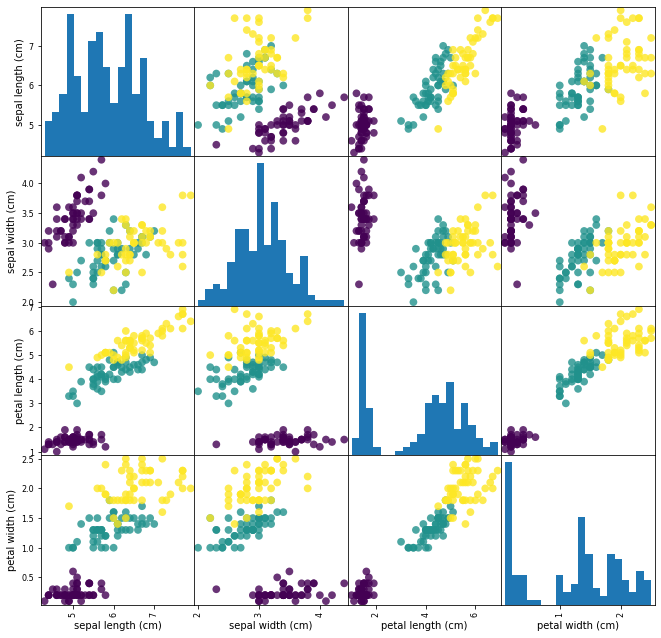

In [40]:
ax2 = pd.plotting.scatter_matrix(
    iris_df.iloc[:, :4],
    figsize=(11, 11),
    c=y,
    marker = 'o',
    hist_kwds={'bins':20},
    s=60,
    alpha=.8
)

plt.show()

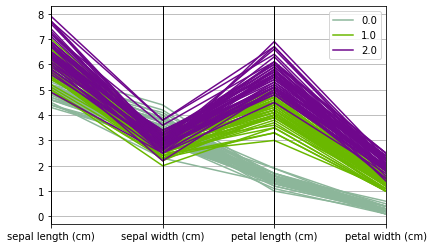

In [43]:
ax3 = pd.plotting.parallel_coordinates(iris_df, 'target')
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

In [51]:
arvore_decisao = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight={0: 1, 1: 1})

arvore_decisao = arvore_decisao.fit(X_train, y_train)

score = arvore_decisao.score(X_train, y_train)

print('Score da base de treinamento: {}'.format(str(score)))

Score da base de treinamento: 1.0


In [52]:
y_pred = arvore_decisao.predict(X_test)

Acurácia da previsão

In [53]:
accuracy_score(y_test, y_pred)

1.0

Relatório de classificação

In [56]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



Matriz de Confusão

In [54]:
matriz_confusao = confusion_matrix(y_test, y_pred)

In [57]:
matriz_confusao_df = pd.DataFrame(
    data=matriz_confusao,
    index=iris.target_names,
    columns=[x + "(prev)" for x in iris.target_names])

matriz_confusao_df.head()

,setosa(prev),versicolor(prev),virginica(prev)
setosa,7,0,0
versicolor,0,11,0
virginica,0,0,5


In [72]:
viz = dtreeviz(arvore_decisao,
              X_train,
              y_train,
              target_name="espécie",
              feature_names=iris.feature_names,
              class_names=["setosa", "versicolor", "virginica"])  
viz.view()

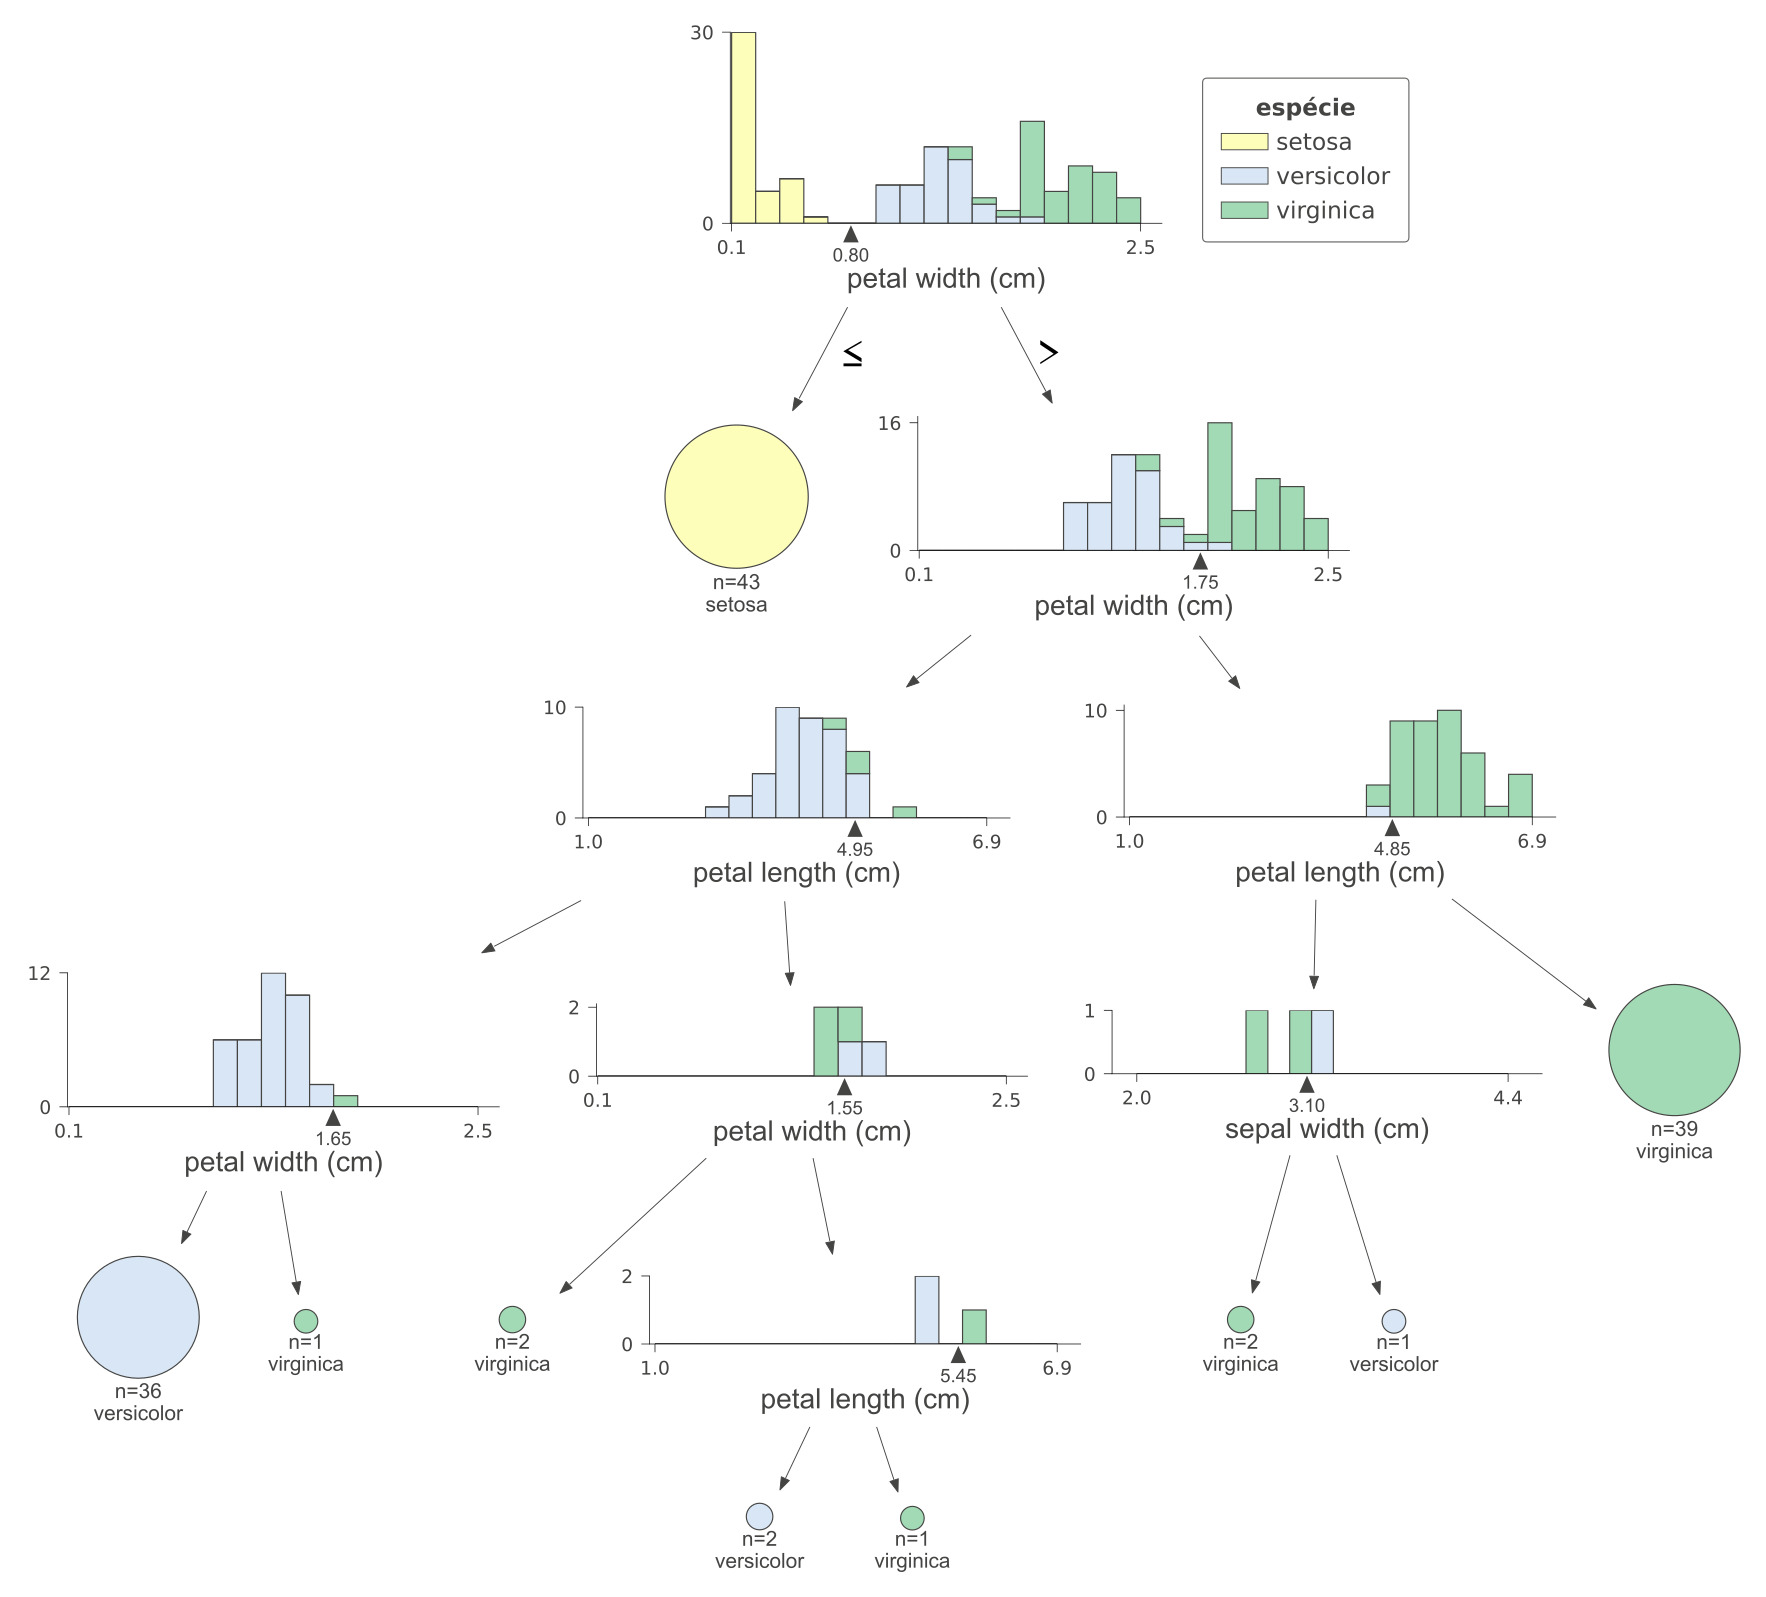

In [2]:
Image(filename='imgs/DTreeViz-Iris.jpeg')